In [3]:
import pandas as pd
file_path = 'DemoExample_GeneExpression.csv'
data = pd.read_csv(file_path, delimiter='\t')
data_transposed = data.set_index('Unnamed: 0').transpose()
print(data_transposed.head())


Unnamed: 0  Acap2   Arc  Arpp21  Atf3  Atf4  Bdnf  Brd9  Calb1  Camkv  Cdk14  \
C1-1         1528  6877    5558  2472   975  6507    92    317    155    436   
C1-2         1341  3871    2232  1770   480  3317    85     18     43     44   
C1-3         1430  5334    3911  1660  2168  3480   297     56     50     47   
C1-4         1192  4252    2947  2000  1231  3872    12     72     21      7   
C1-5         3612  6916    6008  2401  1785  3911   221    749    608    476   

Unnamed: 0  ...  Tpi1  Tpt1  Ttll7  Ttyh1  Tub   Ubc  Uchl1   Vcp  Ypel5  \
C1-1        ...   891  4168   1360   1279  188  3540   1785  3745   3326   
C1-2        ...   298  3865    325    127  110   755    897  1403   1573   
C1-3        ...   996  3356    414    268  455  1624   1415  1615   2215   
C1-4        ...   143  3913    188    587    6   387    844  1460   1103   
C1-5        ...   935  4545   1948   2331  884  2499   1482  1842   2227   

Unnamed: 0  Zfand5  
C1-1          4254  
C1-2          1106  

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_transposed)
pc_data = pca.transform(data_transposed)
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance: [2.23782971e+08 6.51065009e+07 1.07337513e+07 4.14644219e+06
 2.78971783e+06 2.67662865e+06 2.17325160e+06 2.03173830e+06
 1.60772563e+06 1.36713896e+06 1.28536918e+06 1.06747543e+06
 9.33239260e+05 8.09530608e+05 7.46770946e+05 6.05540900e+05
 5.54181432e+05 4.75894905e+05 4.44441802e+05 3.78842329e+05
 3.07360343e+05 2.46816805e+05 1.64550703e+05 1.72355340e-24]
Explained Variance Ratio: [6.89760240e-01 2.00676019e-01 3.30843533e-02 1.27804673e-02
 8.59867232e-03 8.25010058e-03 6.69855502e-03 6.26237237e-03
 4.95544951e-03 4.21389570e-03 3.96185890e-03 3.29025082e-03
 2.87649830e-03 2.49519444e-03 2.30175202e-03 1.86644245e-03
 1.70813854e-03 1.46683808e-03 1.36989103e-03 1.16769553e-03
 9.47368528e-04 7.60756808e-04 5.07190212e-04 5.31246232e-33]


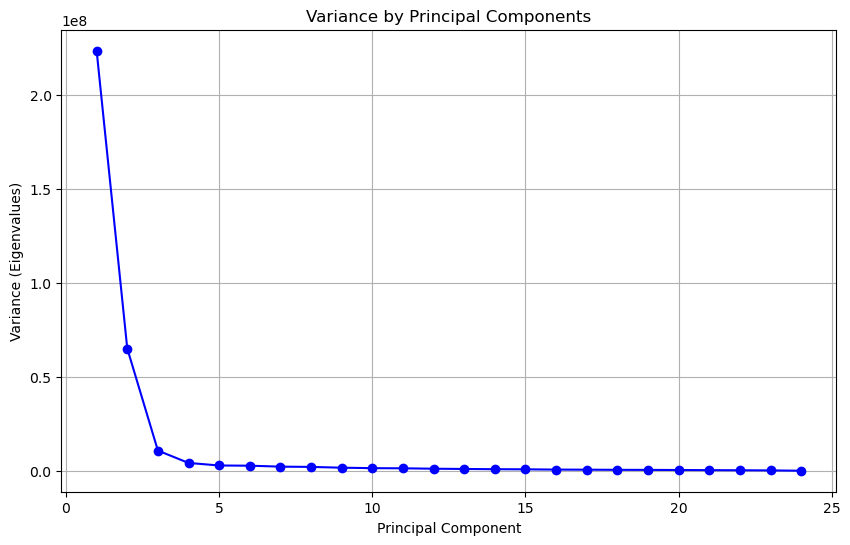

In [23]:
import matplotlib.pyplot as plt

# Plot the explained variance (Eigenvalues)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='blue')
plt.title('Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance (Eigenvalues)')
plt.grid(True)
plt.show()


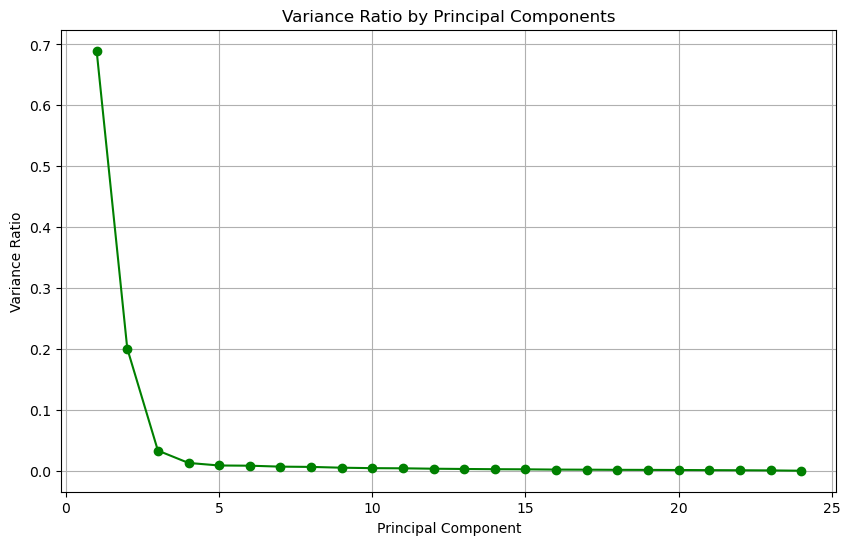

In [25]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='green')
plt.title('Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()


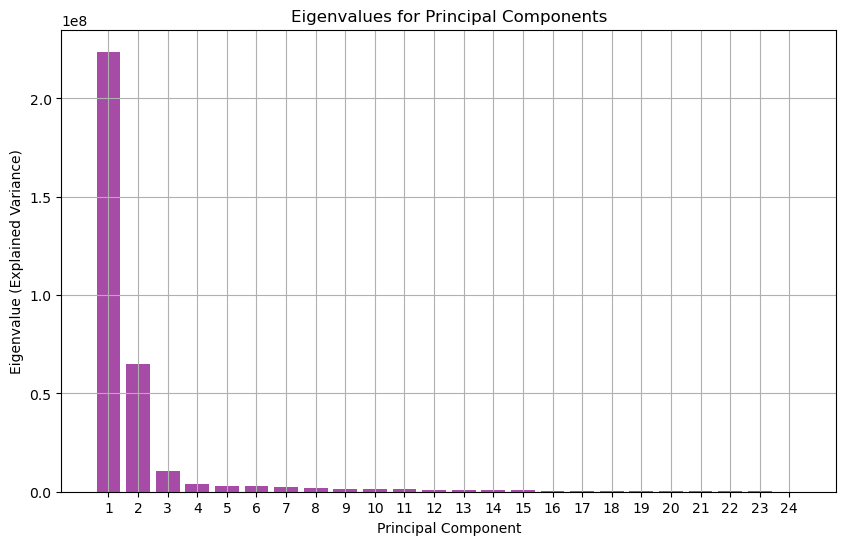

In [17]:
import matplotlib.pyplot as plt

# Plotting the eigenvalues (Explained Variance) for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='purple', alpha=0.7)
plt.title('Eigenvalues for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()


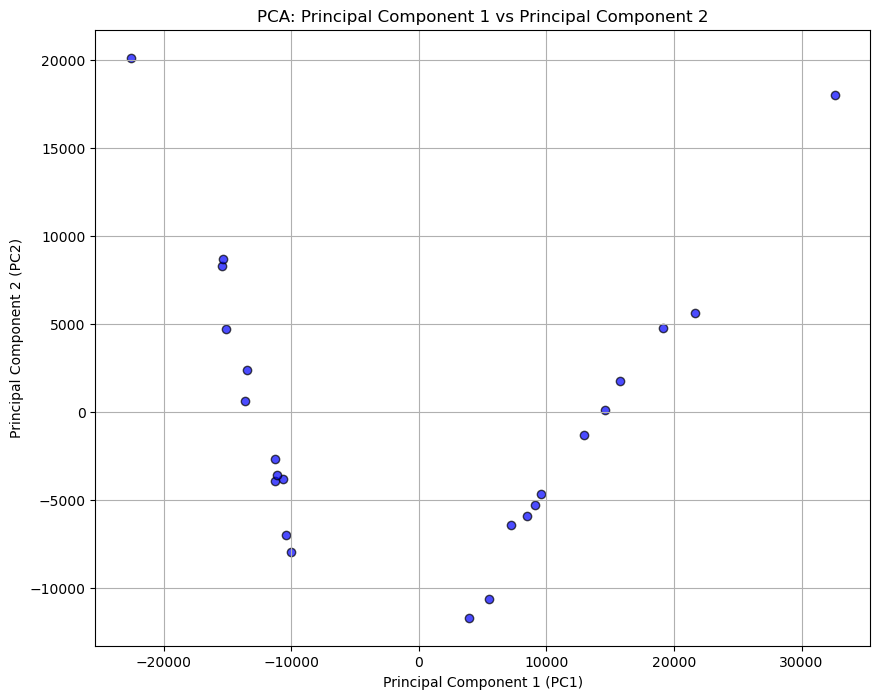

In [11]:
# Scatter plot for PC1 vs PC2
plt.figure(figsize=(10, 8))
plt.scatter(pc_data[:, 0], pc_data[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()


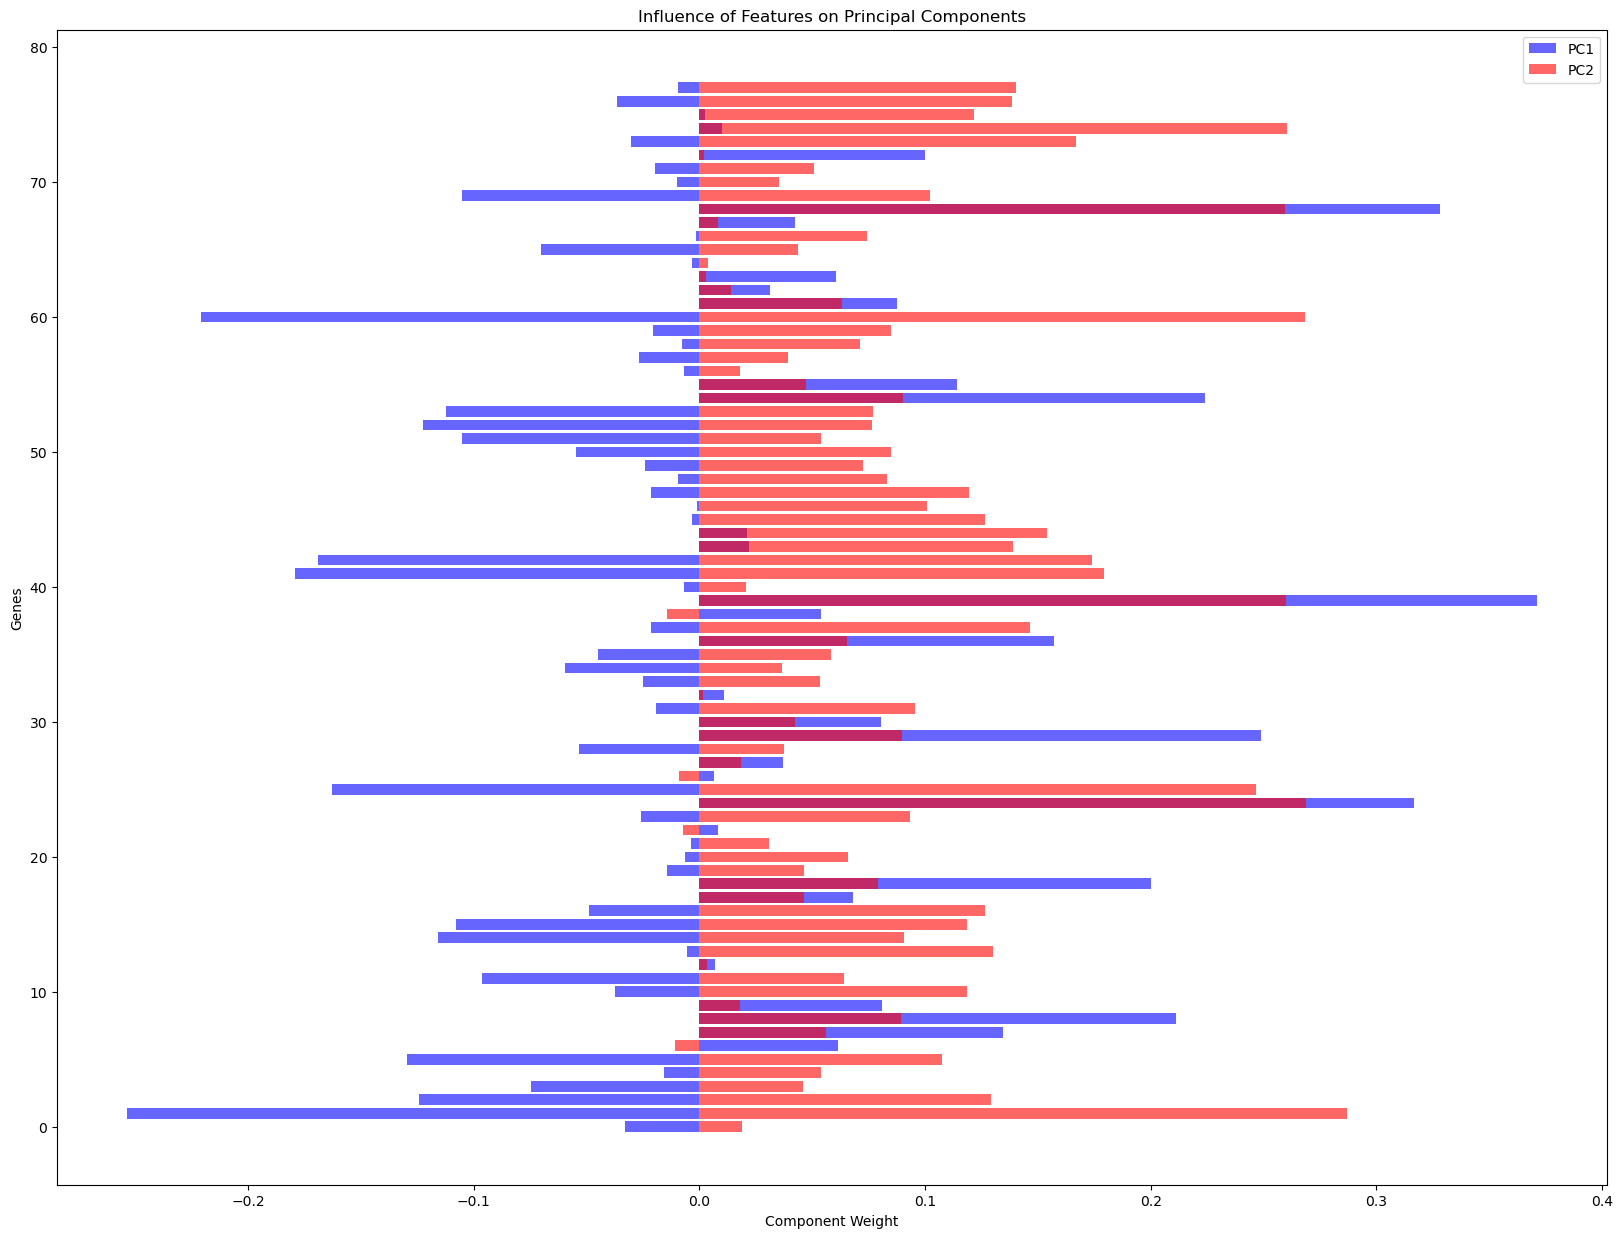

In [37]:
# Plot the influence on each component by features (Loading of each feature)
plt.figure(figsize=(20, 15))
plt.barh(data.index, pca.components_[0], color='blue', alpha=0.6, label='PC1')
plt.barh(data.index, pca.components_[1], color='red', alpha=0.6, label='PC2')
plt.title('Influence of Features on Principal Components')
plt.xlabel('Component Weight')
plt.ylabel('Genes')
plt.legend(loc='upper right')
plt.show()

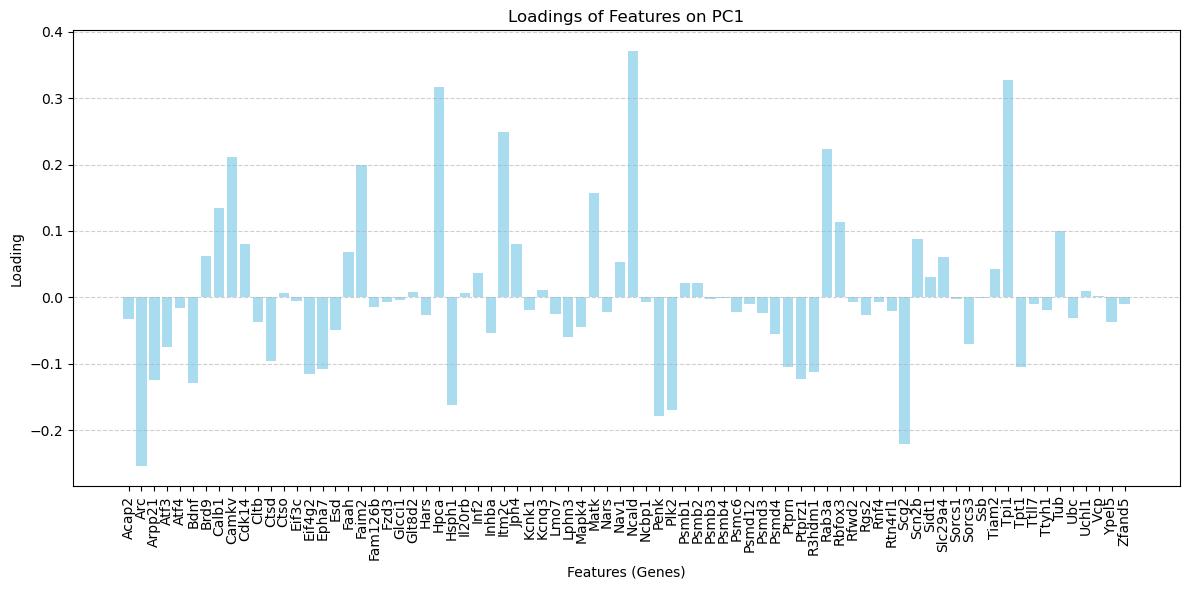

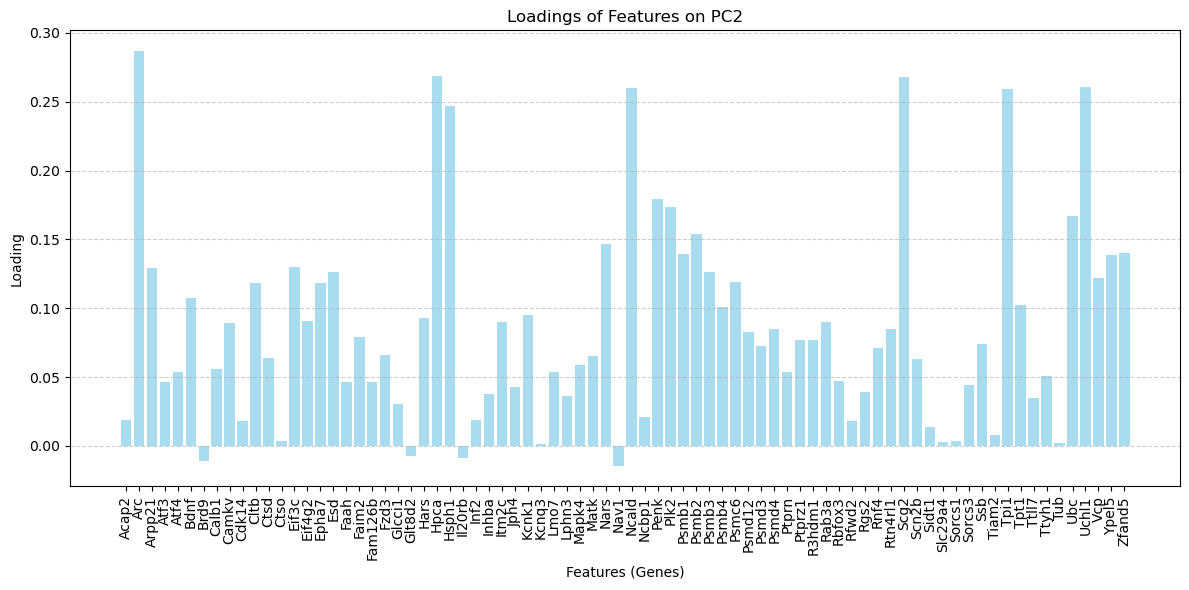

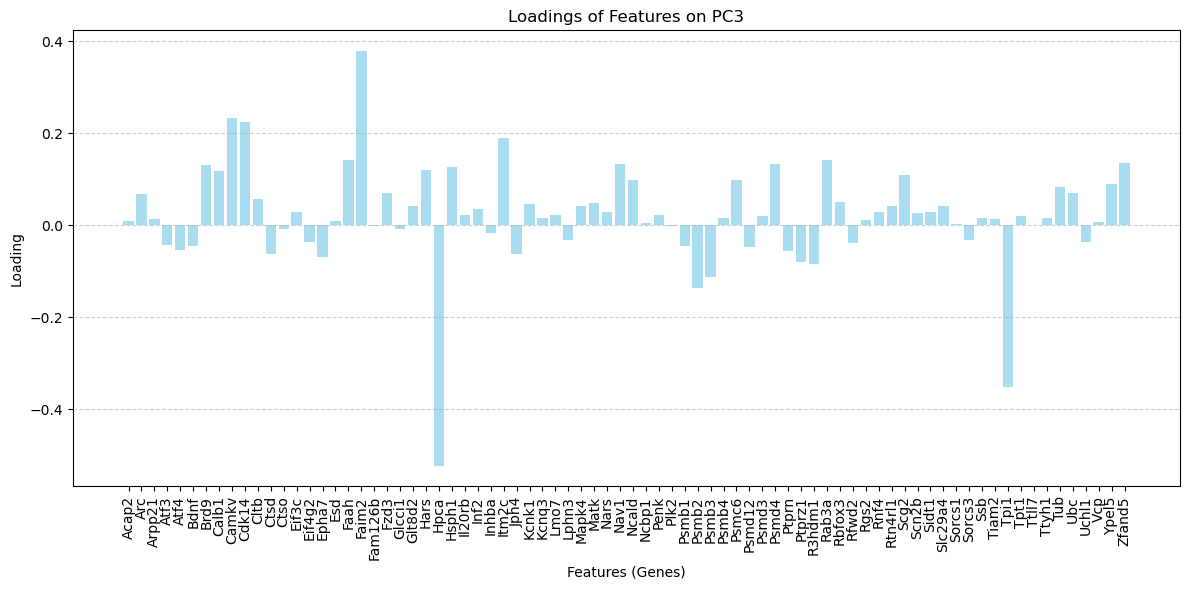

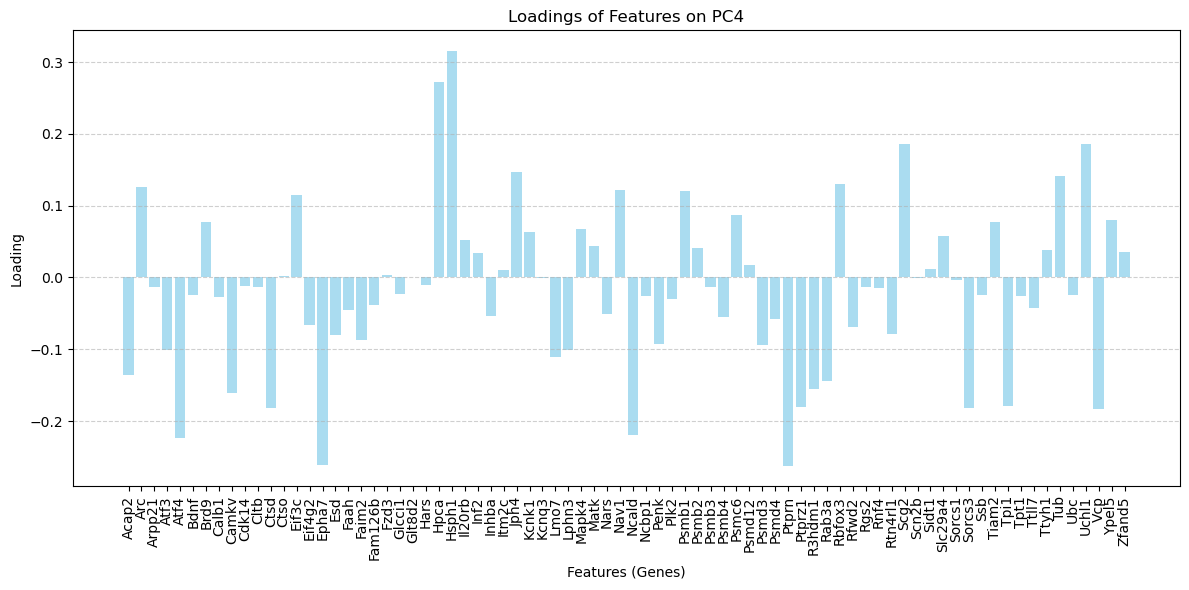

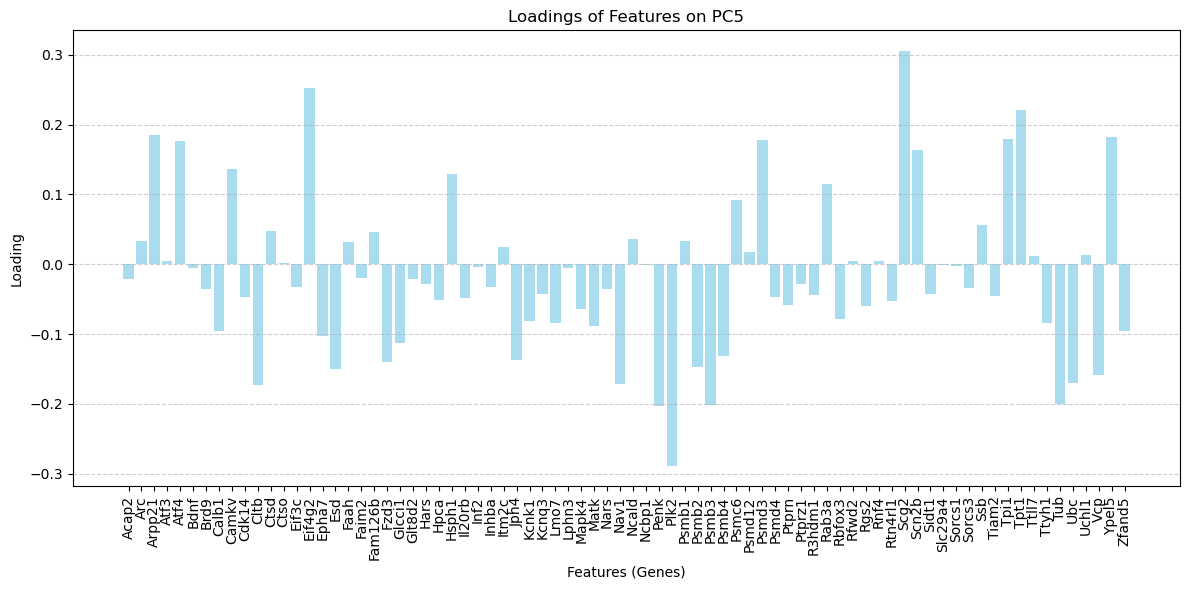

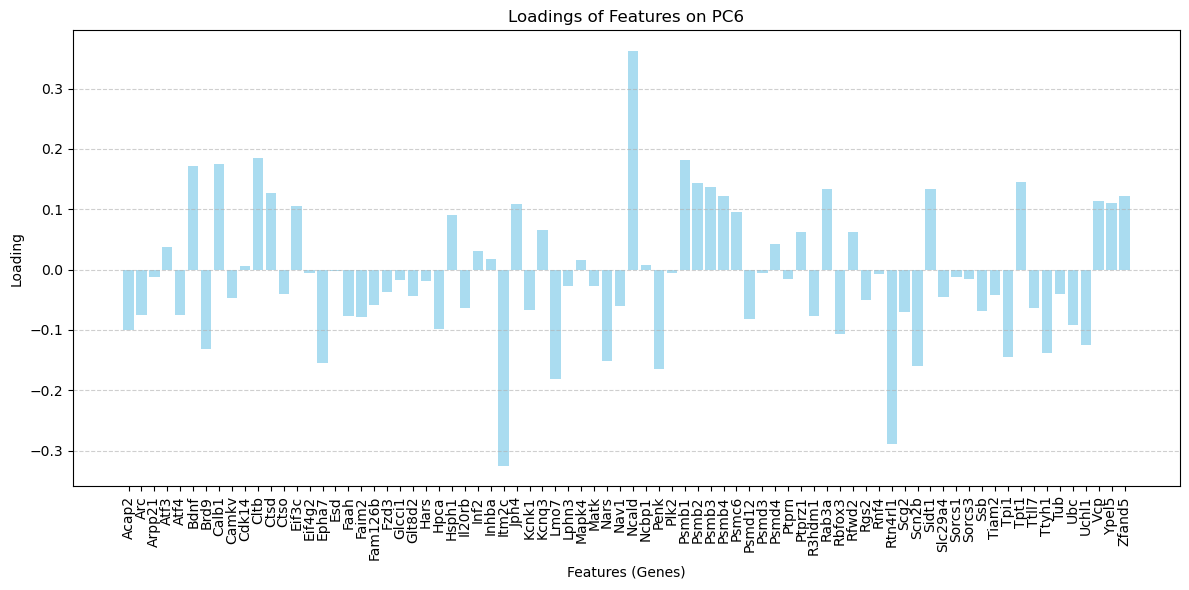

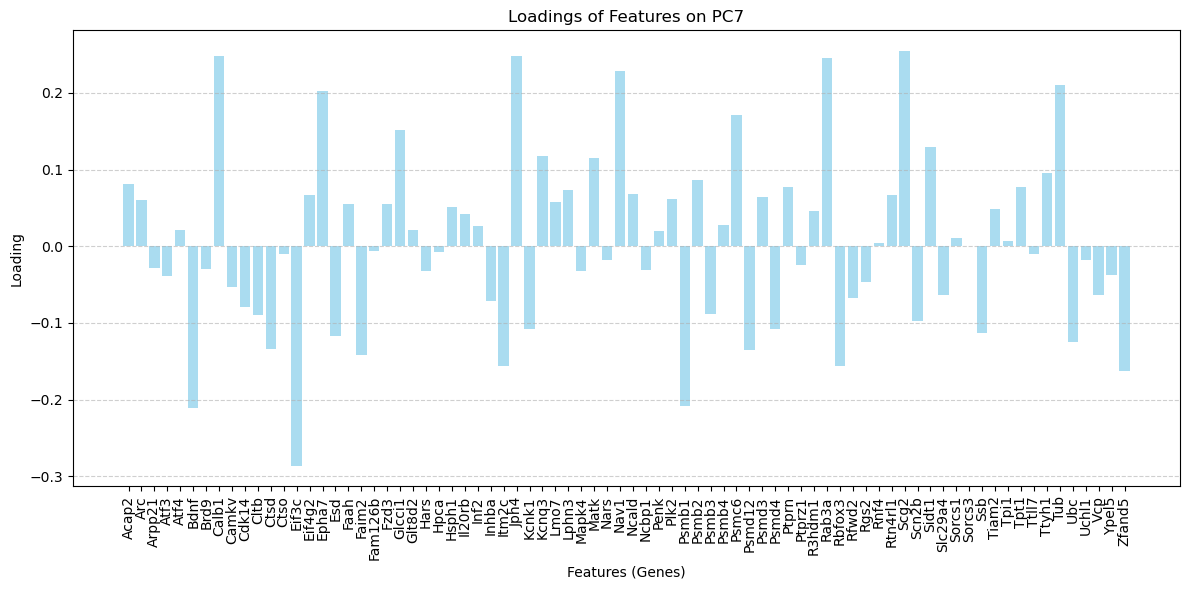

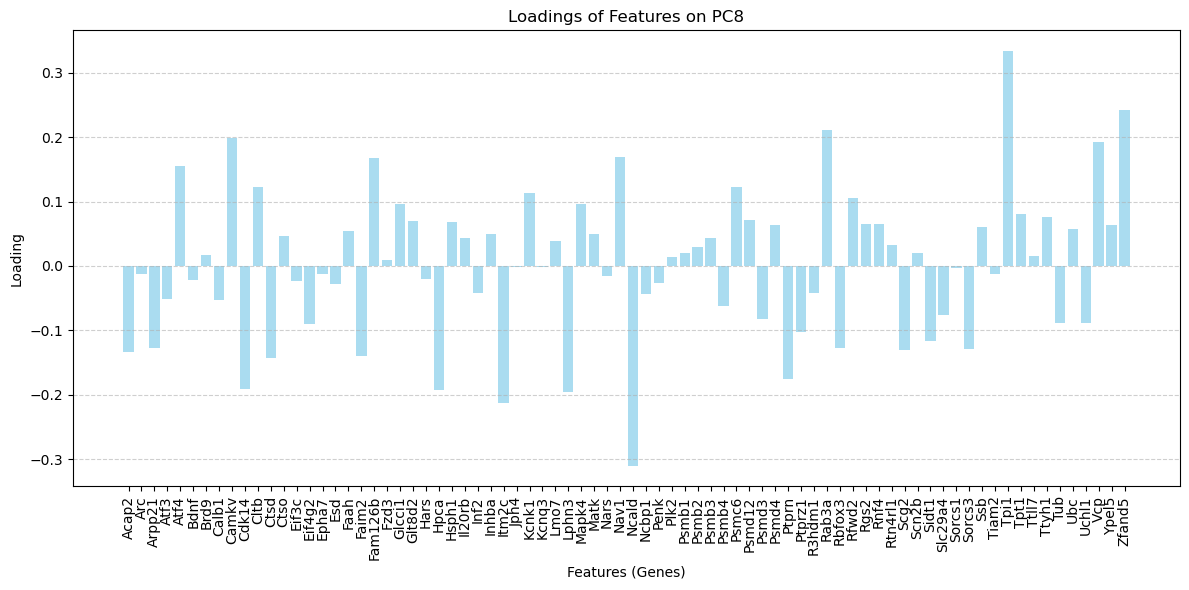

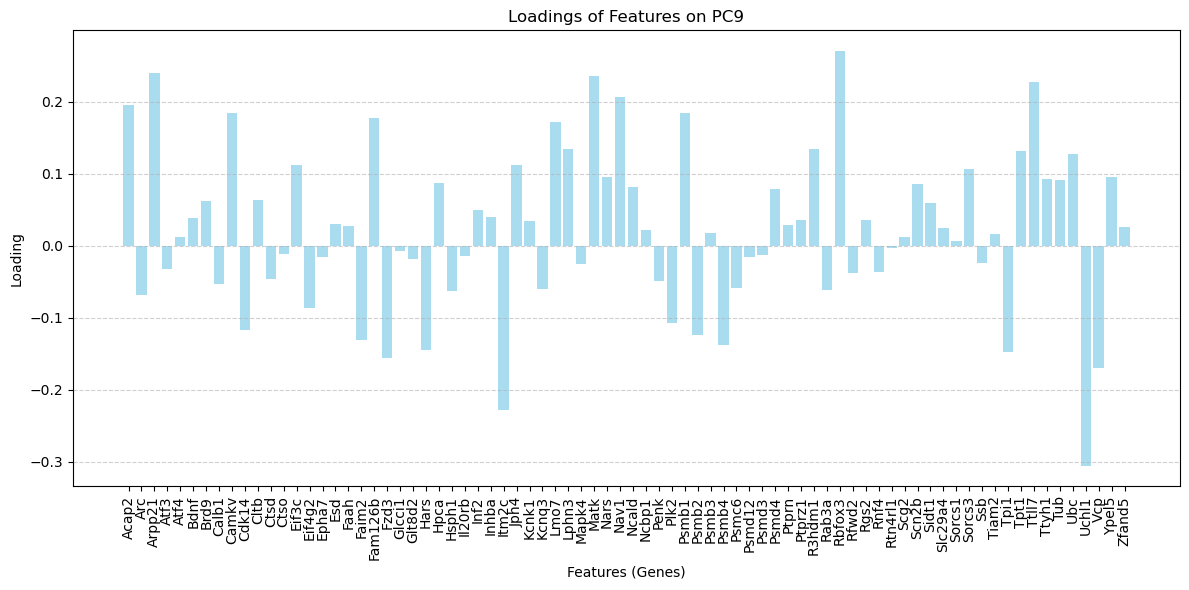

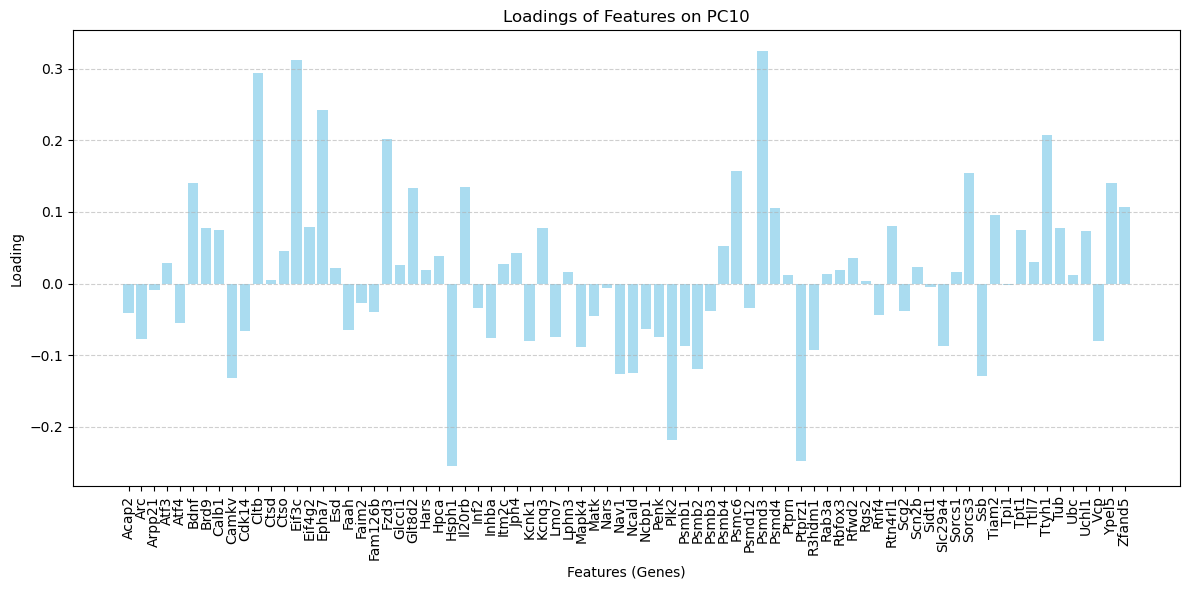

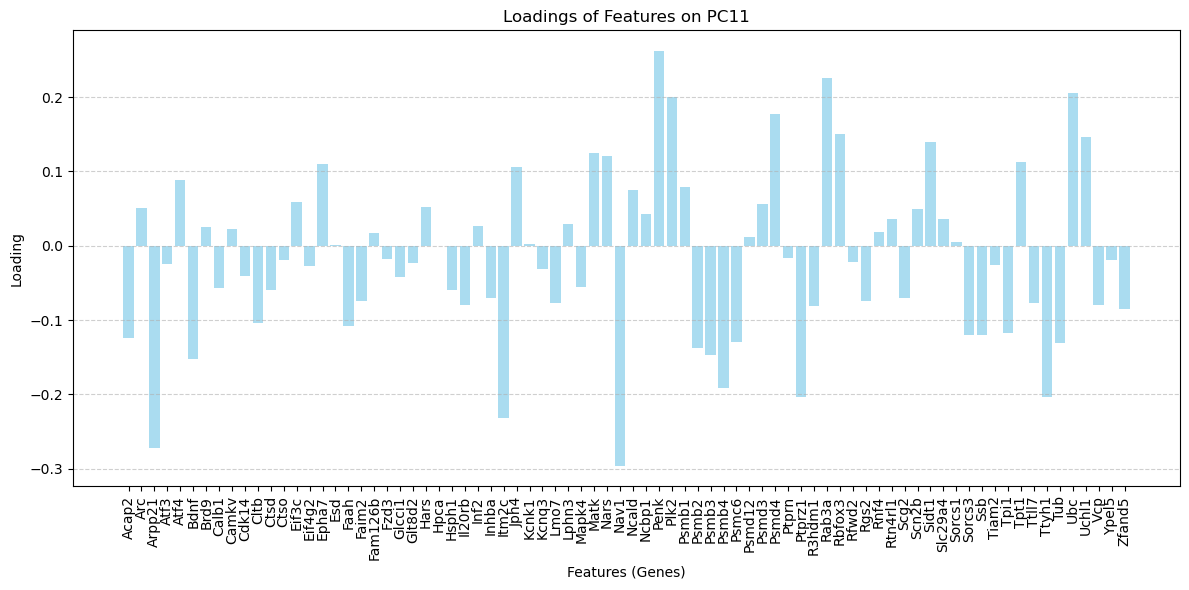

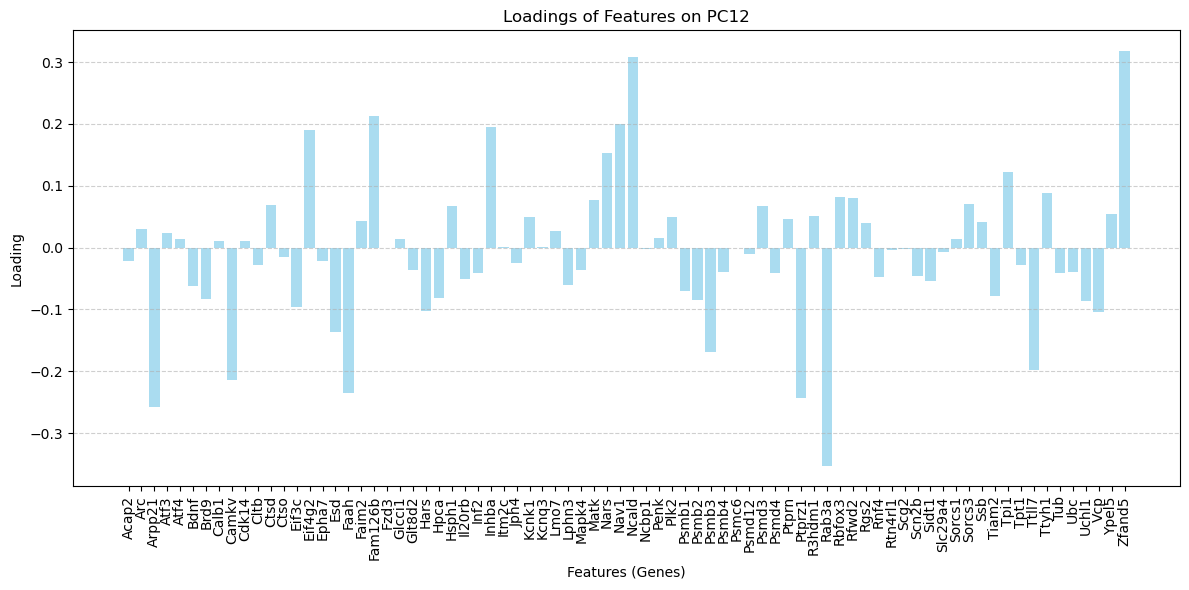

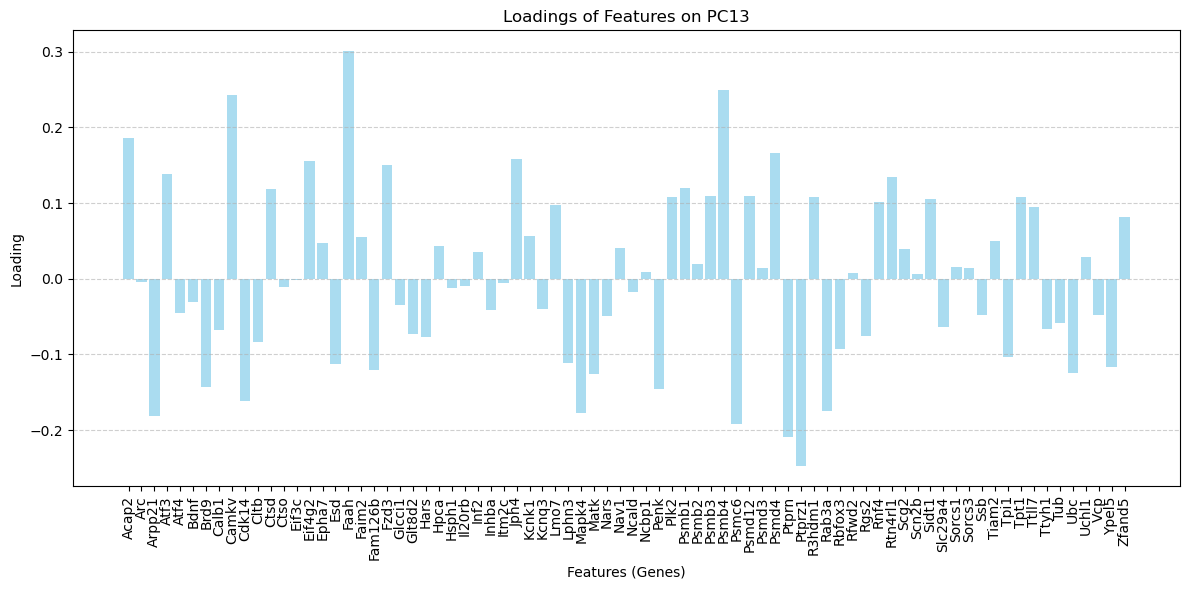

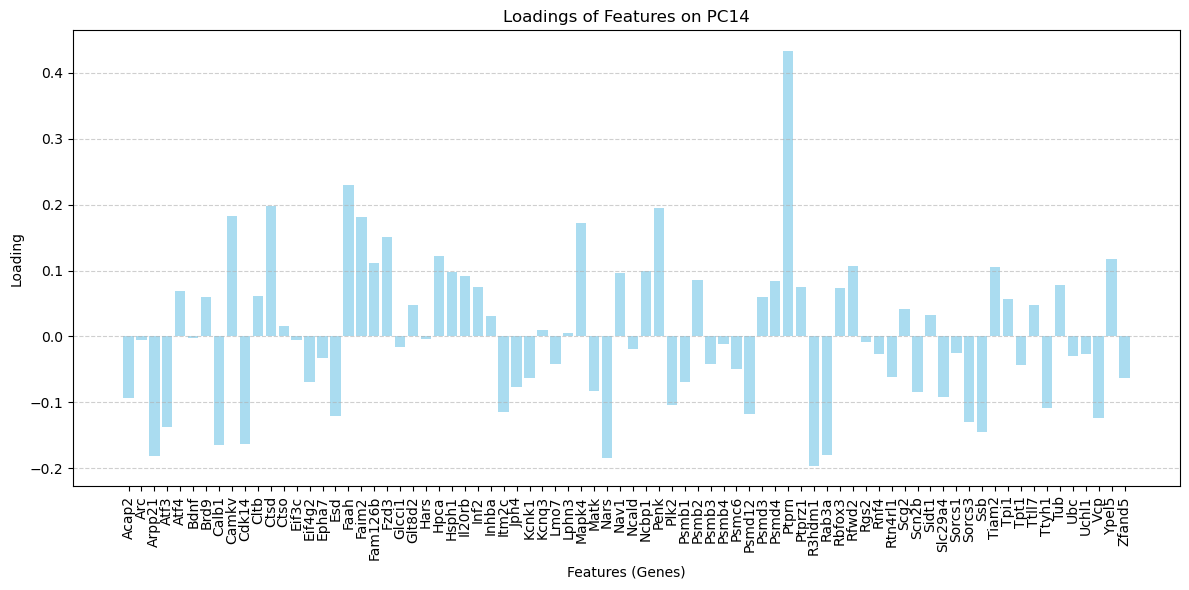

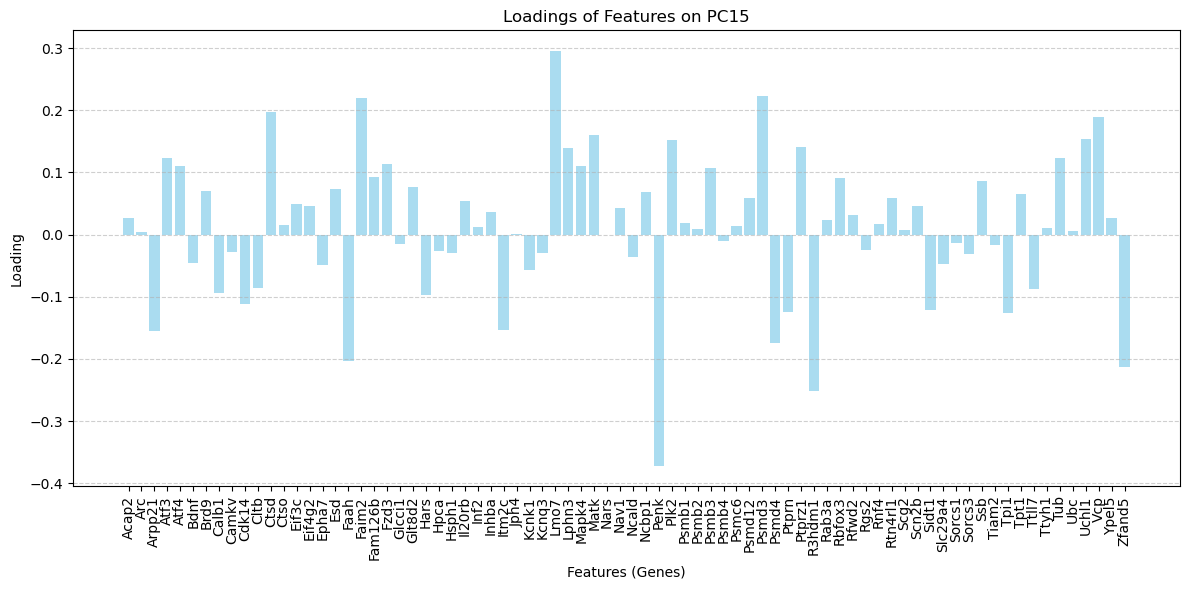

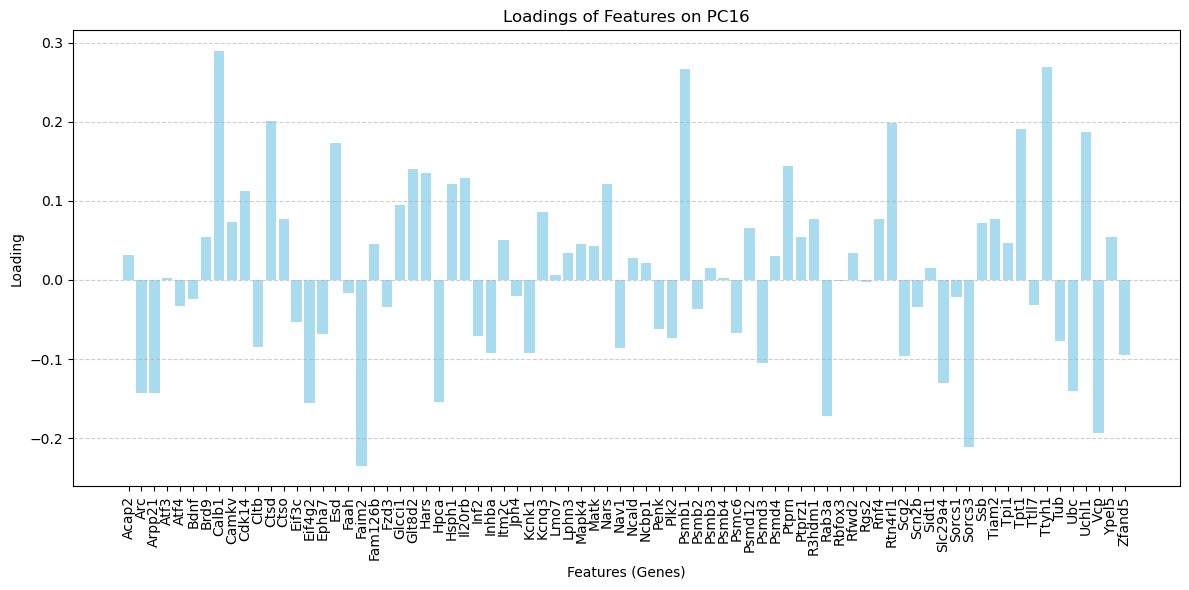

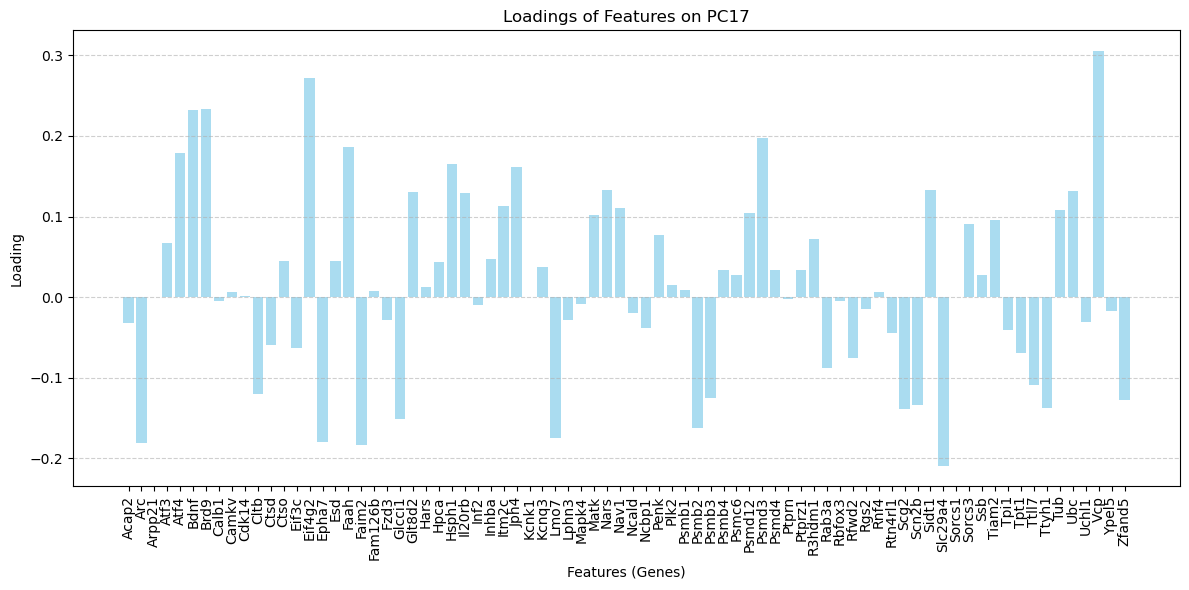

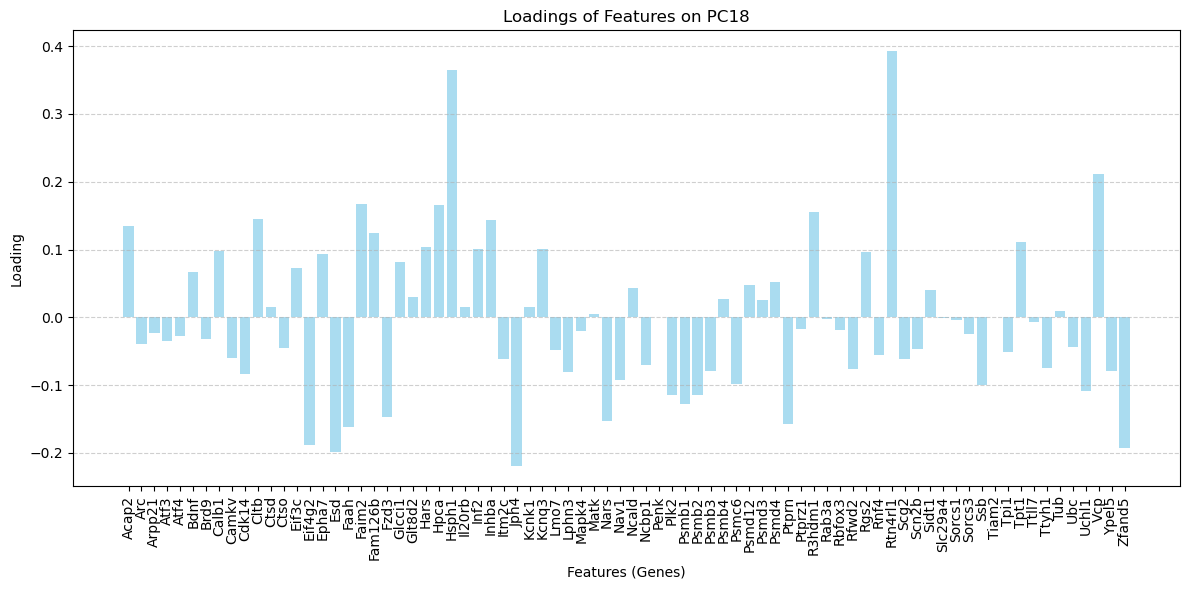

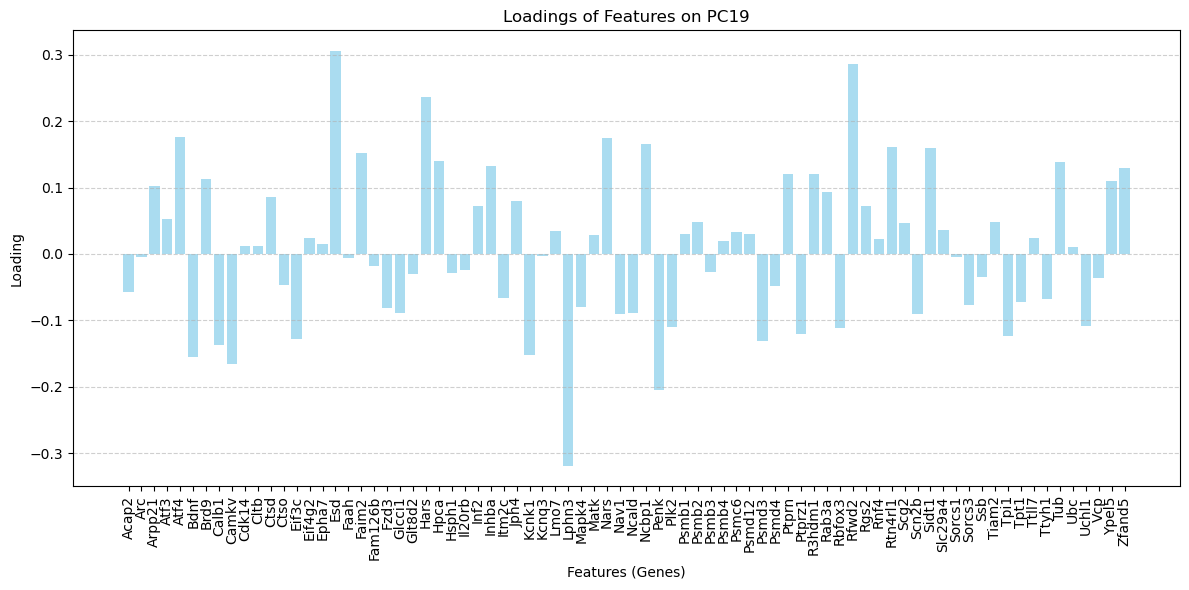

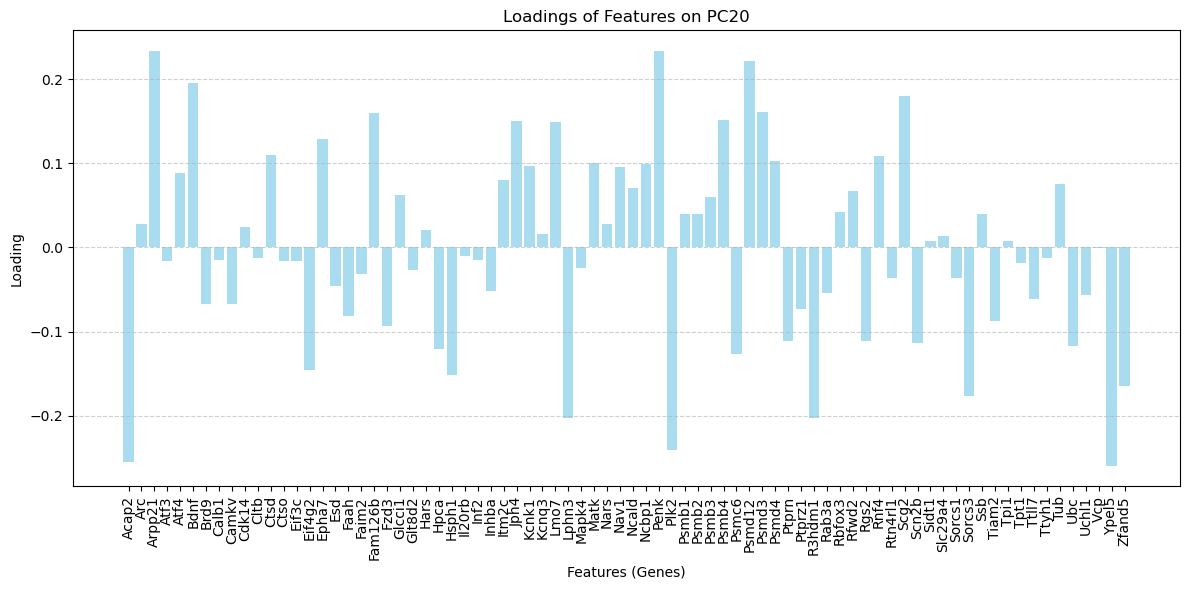

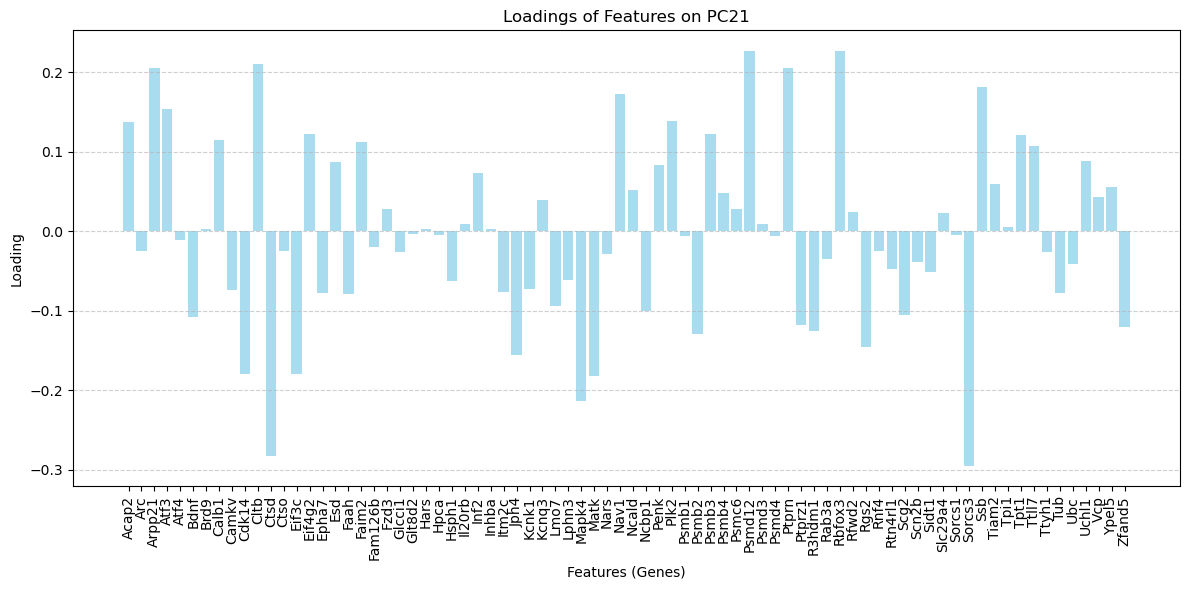

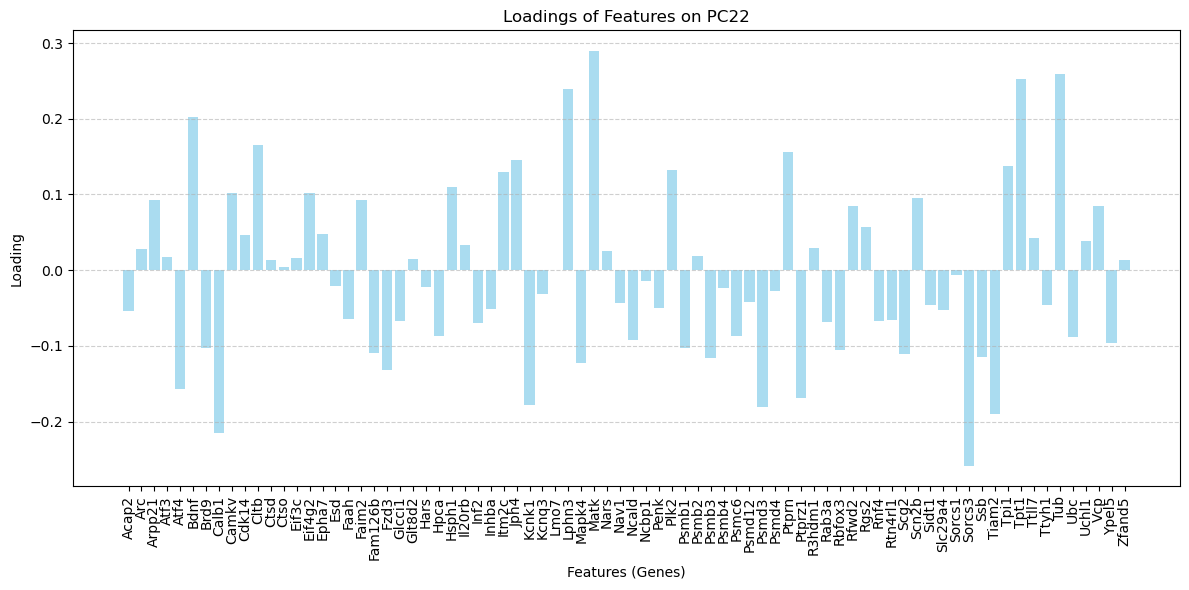

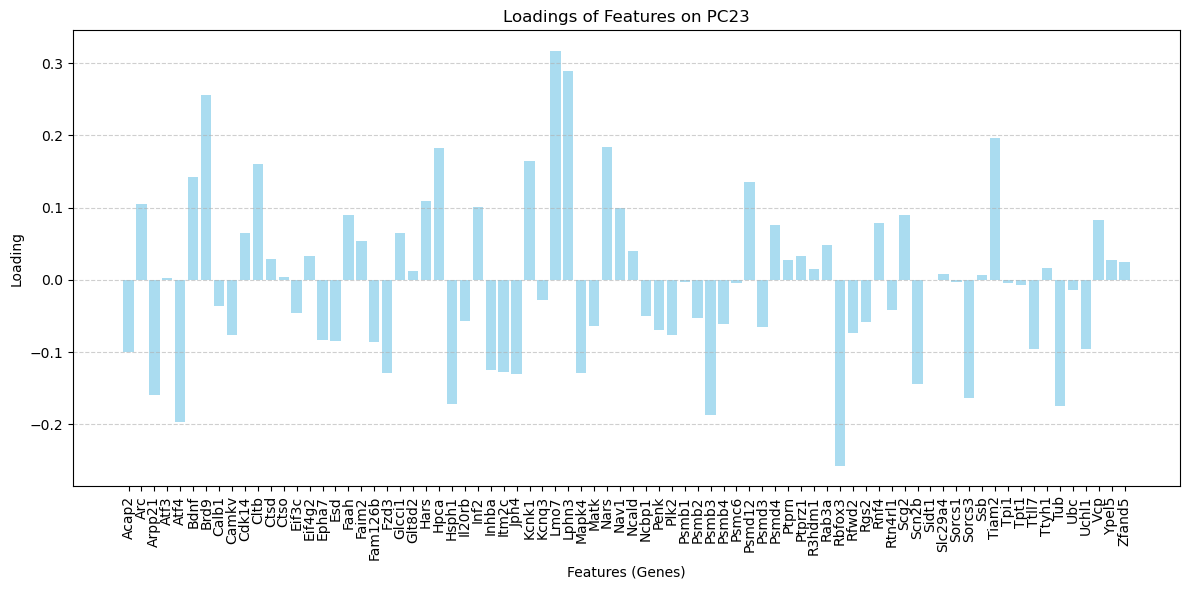

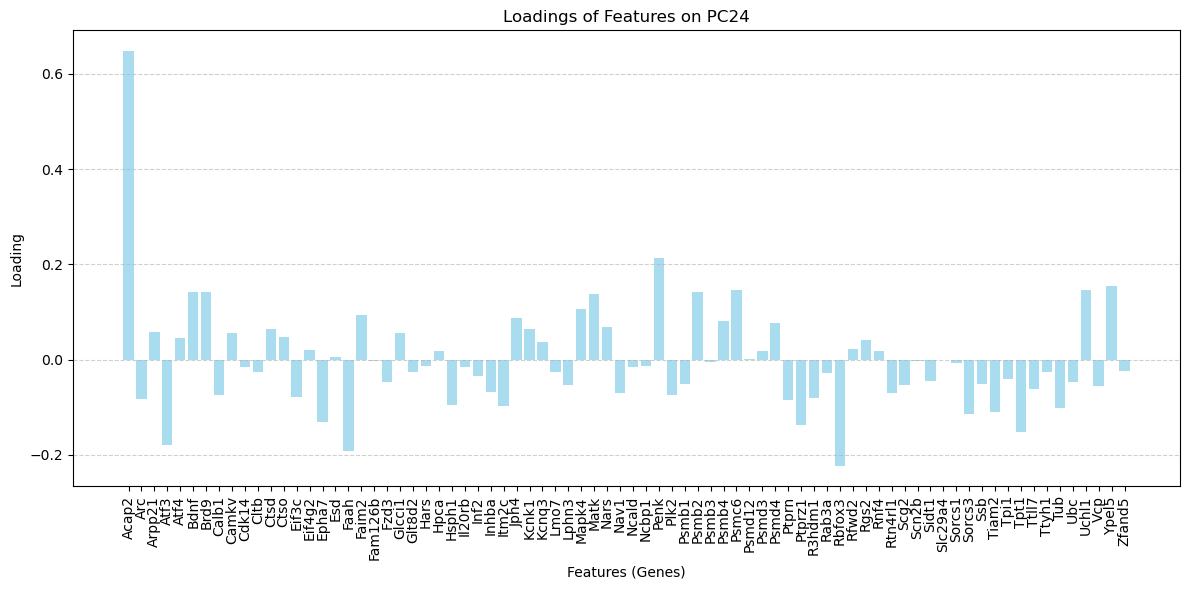

In [49]:
n_components = len(pca.components_)

# Loop through each principal component to plot its loadings
for i in range(n_components):
    plt.figure(figsize=(12, 6))
    component_name = f'PC{i+1}'
    
    # Get the loadings of the current principal component
    loadings = pca.components_[i]
    
    # Create a bar plot for the loadings of each feature on this component
    feature_names = data_transposed.columns
    plt.bar(feature_names, loadings, color='skyblue', alpha=0.7)
    
    plt.title(f'Loadings of Features on {component_name}')
    plt.xlabel('Features (Genes)')
    plt.ylabel('Loading')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


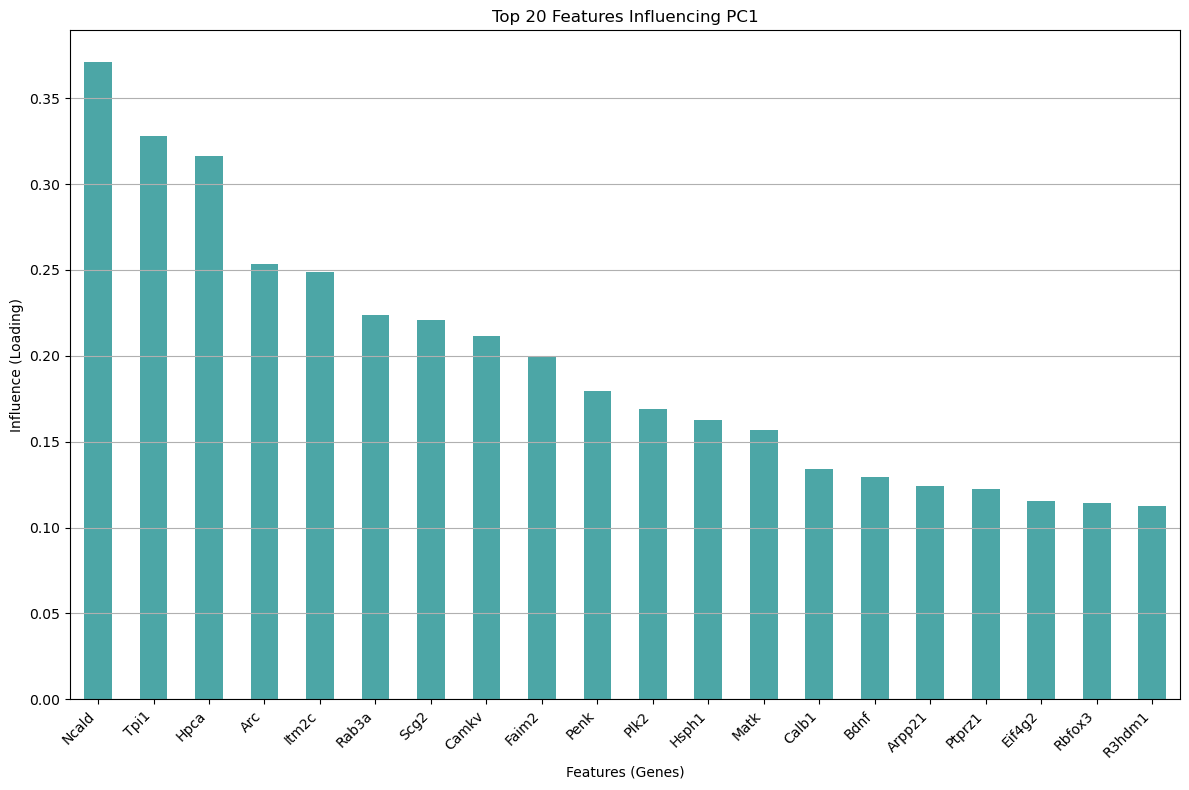

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a principal component to visualize (e.g., PC1)
component_index = 0  # PC1 corresponds to index 0, PC2 to index 1, etc.
component_name = f'PC{component_index + 1}'
selected_component_loadings = feature_influence[component_name]
sorted_loadings = selected_component_loadings.abs().sort_values(ascending=False)
top_features = sorted_loadings.head(20)  # Show top 20 influential features
plt.figure(figsize=(12, 8))
top_features.plot(kind='bar', color='teal', alpha=0.7)
plt.title(f'Top 20 Features Influencing {component_name}')
plt.xlabel('Features (Genes)')
plt.ylabel('Influence (Loading)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


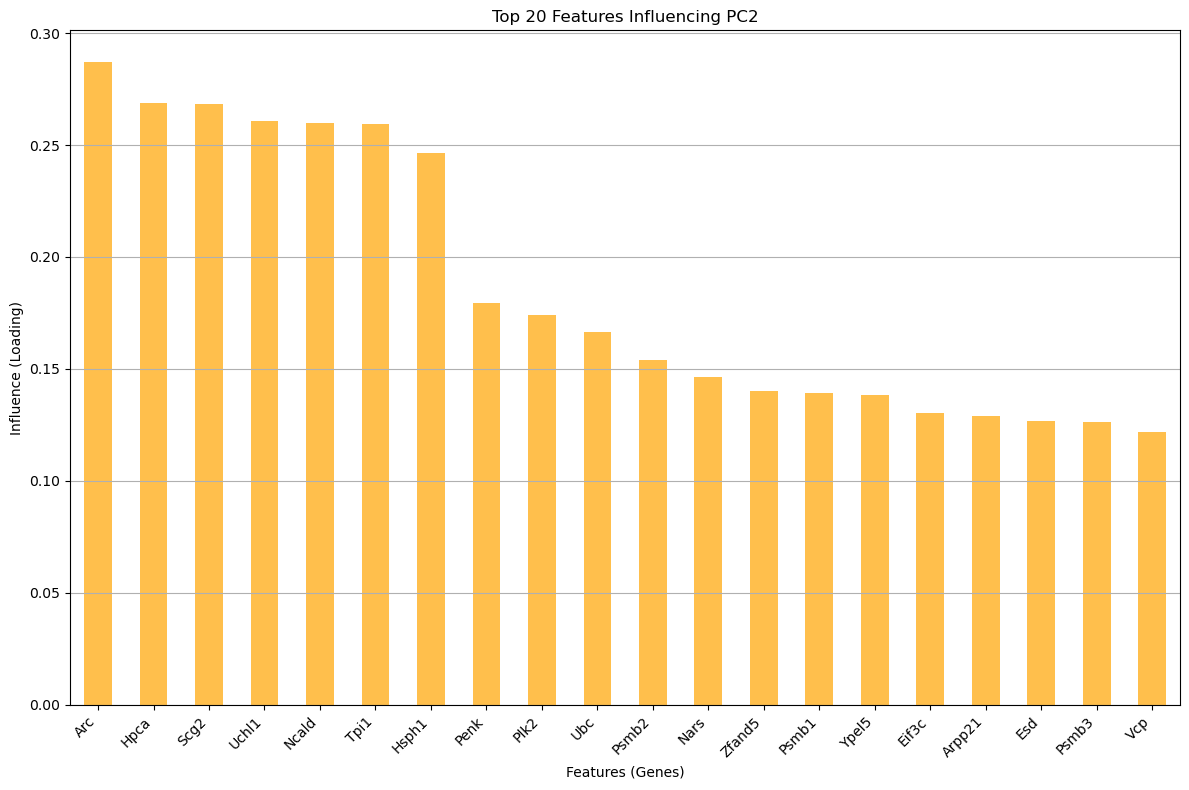

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Choose PC2 for visualization
component_index = 1  # PC2 corresponds to index 1
component_name = f'PC{component_index + 1}'

# Get the loadings (influence) for PC2
selected_component_loadings = feature_influence[component_name]

# Sort features by their influence on PC2
sorted_loadings = selected_component_loadings.abs().sort_values(ascending=False)
top_features = sorted_loadings.head(20)  # Show top 20 influential features

# Plot the influence of top features on PC2
plt.figure(figsize=(12, 8))
top_features.plot(kind='bar', color='orange', alpha=0.7)
plt.title(f'Top 20 Features Influencing {component_name}')
plt.xlabel('Features (Genes)')
plt.ylabel('Influence (Loading)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [15]:
# Sort features by influence for PC1 and PC2
top_10_pc1 = feature_influence['PC1'].abs().sort_values(ascending=False).head(10)
top_10_pc2 = feature_influence['PC2'].abs().sort_values(ascending=False).head(10)

print("Top 10 Features Influencing PC1:")
print(top_10_pc1)

print("\nTop 10 Features Influencing PC2:")
print(top_10_pc2)


Top 10 Features Influencing PC1:
Unnamed: 0
Ncald    0.370979
Tpi1     0.328145
Hpca     0.316535
Arc      0.253412
Itm2c    0.248703
Rab3a    0.223879
Scg2     0.220699
Camkv    0.211308
Faim2    0.200065
Penk     0.179266
Name: PC1, dtype: float64

Top 10 Features Influencing PC2:
Unnamed: 0
Arc      0.286856
Hpca     0.268892
Scg2     0.268291
Uchl1    0.260589
Ncald    0.259828
Tpi1     0.259397
Hsph1    0.246652
Penk     0.179269
Plk2     0.173878
Ubc      0.166724
Name: PC2, dtype: float64
